In [18]:
# worked with Pranav

# Put import statements here
from sklearn.datasets import load_iris
import random
random.seed(15)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# DSCI6003 Lab - SVM

Today we will be implementing sklearn's version of SVM. For those of you who are curious, the SVM practicums contain more information about implementing your own version of SVM.

Today We Will:

    1. Learn how the parameters influence the decision boundary for SVM
    2. Compare and contrast an SVM to see how it differs from Logistic Regression.
    3. Using SVMs to deal with unbalaanced classes

### Part 1 - Parameter Tuning

1. Load in the rbf_data and the rbf_labels dataset using pandas (make sure to set delim_whitespace=True and header = None).
2. Plot the data using matplotlib, setting the c attribute to labels for the points. 
3. Plot gamma from [0.1,0.3,1,3,10], keeping C constant at 1. What do you notice?
4. Plot C from [1E-1,1,10,100] holding gamma constant at 3. What do you notice?
5. This may take a while, but plot gamma at 250. What do you notice? 


### Part 2 - Compare and Contrast

1. We will be using the iris dataset. Load in the iris dataset from sklearn. 
2. Make the classfication binary by changing any 2 label to a 1.
3. Plot the the third and fourth columns of the dataset (watch out for indexing!). Use plt.copper() before plt.show() to change the color of the points (or use your favorite colormap).
4. Run a Logistic Regression Classifier (LRC) on the third and fourth columns and plot the boundary. What do you notice about the boundary? (Use the function below to plot the decision boundary.
5. Now, run an SVM on the third and fourth column, and use the function below to plot the boundary. What do you notice? Which kernel can you use to correctly classify the last point?
6. Now run steps 3 - 5 again, except now you will change every 2 into a 0 rather than a one. What do you notice about the decision boudaries? 
7. To get an even better understanding of why we might prefer SVMs over LRC, load in the data_scientist.csv data. Plot it with a logistic regression and SVM decision boundary. What do you notice? 

### Part 3 - Imbalanced Classes

Let's pretend this data now corresponds to credit card fraud, where a true positive means saving thousands of dollars and maintaining customer loyalty while a false positive means us calling the customer and having them confirm that they were the ones to make the purchase (a small cost for letting fraudsters escape). How can you catch as many true positives (fraudsters) as possible? 

1. Now create variables X_small, y_small which are subsets of the iris data. You can run the "annihilate_data" function to remove the data.
2. What do the class counts look like now? Plot the data.
3. Run an LRC and plot the decision boundary. What is the behavior of the model? 
4. Now plot the decision boundary for an SVM. What is the behavior? Change the kernels. Does anything happen? 
5. Now as the data scientist, you should be able to look at documentation and figure out what the best tool for the job will be. Looking at the SVC inputs, what variable can you change to fix this problem? Plot the decision boundary after you have made this adjustment.


In [20]:
def decision_boundary(clf, X, Y, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [21]:
X = pd.read_csv("rbf_data.csv",delim_whitespace=True,header = None)
y = pd.read_csv("rbf_labels.csv",delim_whitespace=True,header = None)
#print(X)
X = X.as_matrix()
y = y.as_matrix()


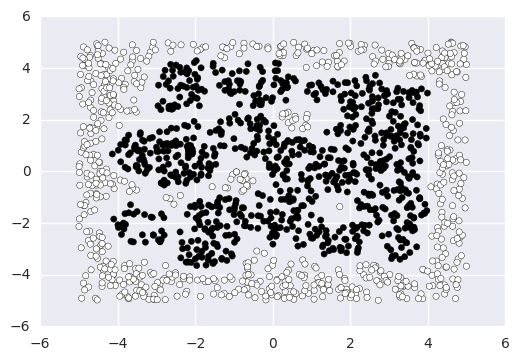

In [22]:
plt.scatter(X[:,0],X[:,1],c = y)

/Users/justw/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


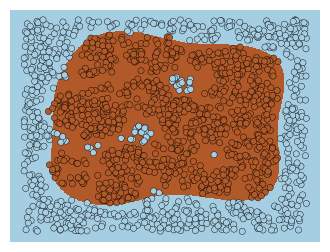

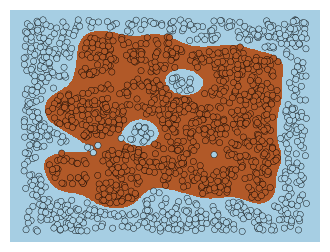

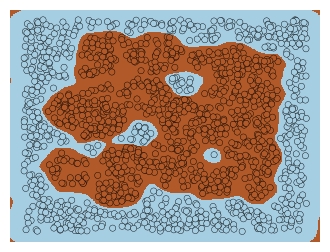

In [23]:
C = 1
gamma = [1e-1, 1, 1e1]
classifiers = []
for gamma in gamma:
    clf = SVC(C=1, gamma=gamma)
    clf.fit(X, y)
    decision_boundary(clf,X,y)


we notice that two defiinite groups are forming , or is in the process as value of gamma increases

C = [1E-1,1,10,100]
gamma = 3
classifiers = []
for C in C:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X, y)
    decision_boundary(clf,X,y)

As the C value increases , two definite groups seem to be  forming

/Users/justw/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


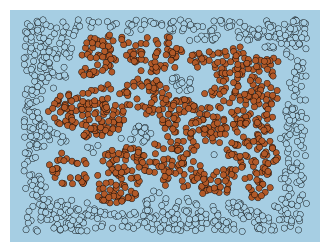

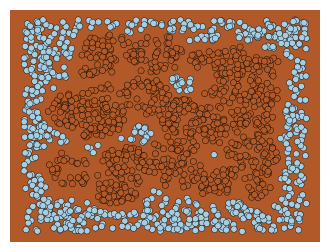

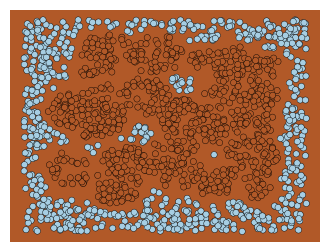

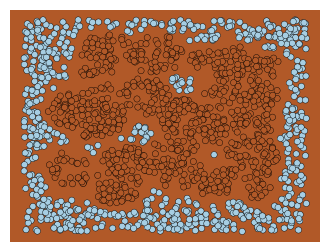

In [24]:
C = [1E-1,1,10,100]
gamma = 250
classifiers = []
for C in C:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X, y)
    decision_boundary(clf,X,y)

The groups are swapped and are more definite

In [25]:
## Part 2

iris = load_iris()
X = iris.data[:,:2]
y = iris.target
y = np.where( y==2 , 1,y)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

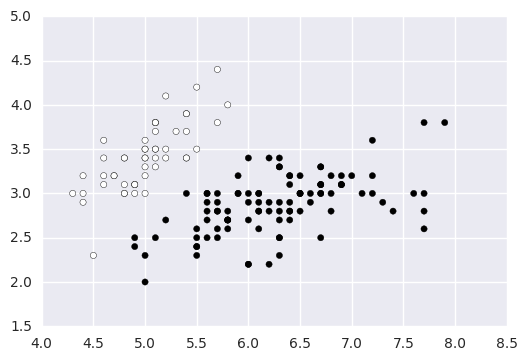

In [26]:
plt.scatter(X[:,:1],X[:,1:2],c=y)


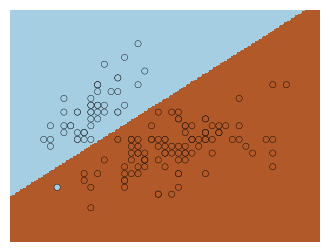

In [27]:
logreg = LogisticRegression()
logreg.fit(X,y)
decision_boundary(logreg,X,y)

    

we have two different groups , but one group has misclassified one data point

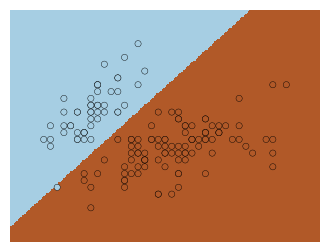

In [28]:
clf = SVC(kernel = 'linear')
clf.fit(X, y)
decision_boundary(clf,X,y)

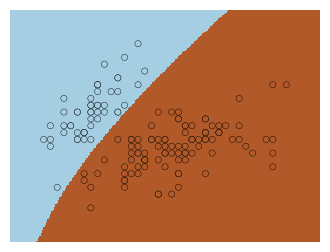

In [29]:
clf = SVC(kernel = 'poly')
clf.fit(X, y)
decision_boundary(clf,X,y)

we use the poly or linear kernel to clasify the last point correctly , poly seems more right

In [30]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target
y = np.where( y==2 , 0,y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

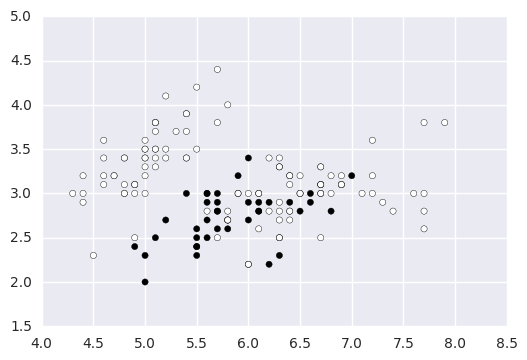

In [31]:
plt.scatter(X[:,:1],X[:,1:2],c=y)

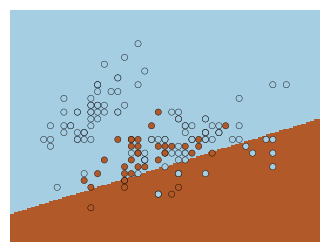

In [32]:
logreg = LogisticRegression()
logreg.fit(X,y)
decision_boundary(logreg,X,y)

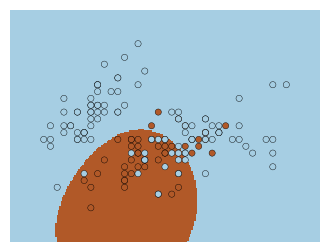

In [33]:
clf = SVC()
clf.fit(X, y)
decision_boundary(clf,X,y)

The decision boundaries are not so right , they do not tend to seperate the groups correctly

In [34]:
datscienc = pd.read_csv("data_scientist.csv")
datscienc

,email_hours,gym_hours,data_scientist
0,18.995746,6.879446,1
1,19.178514,5.954391,1
2,20.895603,11.638996,1
3,22.242337,10.323360,1
4,38.854161,26.899764,0
5,34.078370,28.292012,0
6,12.126729,7.544094,1
7,38.072148,42.610761,0
8,34.363463,47.715896,0
9,20.402499,14.147859,1


In [36]:
datscienc = np.asarray(datscienc)
#datscienc.as_matrix()
X = datscienc[:,:2]
y = datscienc[:,2:3]

/Users/justw/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


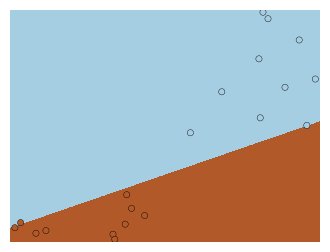

In [37]:
logreg = LogisticRegression()
logreg.fit(X,y)
decision_boundary(logreg,X,y)

/Users/justw/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


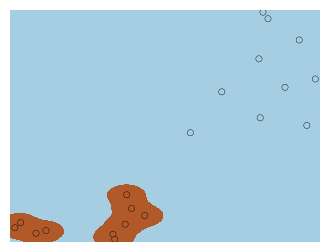

In [38]:
clf = SVC()
clf.fit(X, y)
decision_boundary(clf,X,y)

The svc has two distinct groups compared to logistic regression

In [40]:
## Part 3

def annihilate_data(X,y,num=10):
    y_0 = len(X[y == 0])
    y_1 = len(X[y == 1])
    smaller = 0 if y_0 < y_1 else 1
    idx = np.random.choice(np.where(y == smaller)[0],size = num)
    full_idx = np.append(np.where(y != smaller)[0],idx)
    return X[full_idx],y[full_idx]

iris = load_iris()
X = iris.data[:,:2]
y = iris.target


In [41]:
X_small,y_small= annihilate_data(X,y,num=10)
X_small,y_small

(array([[ 5.1,  3.5],
        [ 4.9,  3. ],
        [ 4.7,  3.2],
        [ 4.6,  3.1],
        [ 5. ,  3.6],
        [ 5.4,  3.9],
        [ 4.6,  3.4],
        [ 5. ,  3.4],
        [ 4.4,  2.9],
        [ 4.9,  3.1],
        [ 5.4,  3.7],
        [ 4.8,  3.4],
        [ 4.8,  3. ],
        [ 4.3,  3. ],
        [ 5.8,  4. ],
        [ 5.7,  4.4],
        [ 5.4,  3.9],
        [ 5.1,  3.5],
        [ 5.7,  3.8],
        [ 5.1,  3.8],
        [ 5.4,  3.4],
        [ 5.1,  3.7],
        [ 4.6,  3.6],
        [ 5.1,  3.3],
        [ 4.8,  3.4],
        [ 5. ,  3. ],
        [ 5. ,  3.4],
        [ 5.2,  3.5],
        [ 5.2,  3.4],
        [ 4.7,  3.2],
        [ 4.8,  3.1],
        [ 5.4,  3.4],
        [ 5.2,  4.1],
        [ 5.5,  4.2],
        [ 4.9,  3.1],
        [ 5. ,  3.2],
        [ 5.5,  3.5],
        [ 4.9,  3.1],
        [ 4.4,  3. ],
        [ 5.1,  3.4],
        [ 5. ,  3.5],
        [ 4.5,  2.3],
        [ 4.4,  3.2],
        [ 5. ,  3.5],
        [ 5.1,  3.8],
        [ 

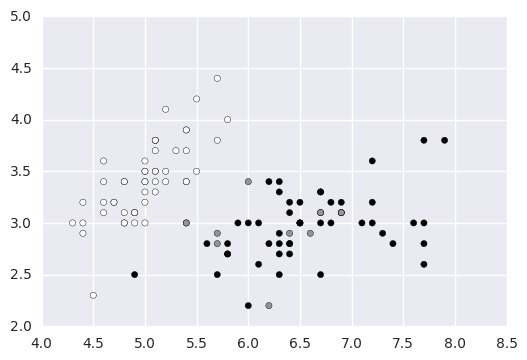

In [42]:
plt.scatter(X_small[:,:1],X_small[:,1:2],c = y_small)

The class counts look more obvious in this case , rather distinct and more seperated

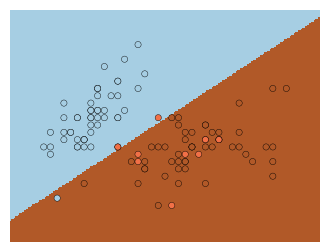

In [43]:
logreg = LogisticRegression()
logreg.fit(X_small,y_small)
decision_boundary(logreg,X_small,y_small)

Two points are misclassified

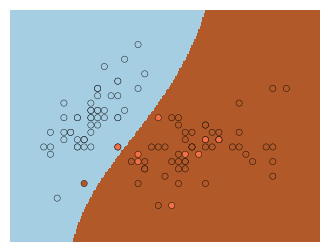

In [44]:
clf = SVC()
clf.fit(X_small, y_small)
decision_boundary(clf,X_small,y_small)

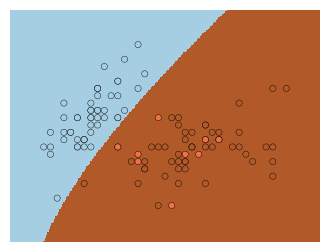

In [45]:
clf = SVC(kernel = 'poly')
clf.fit(X_small, y_small)
decision_boundary(clf,X_small,y_small)

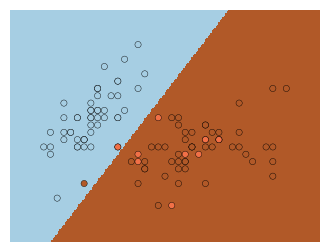

In [46]:
clf = SVC(kernel = 'linear')
clf.fit(X_small, y_small)
decision_boundary(clf,X_small,y_small)

the classification is better using SVM and the decision boundaries make them more distinct, the poly kernel serves as the best decision boundary

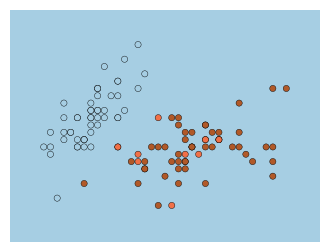

In [47]:
clf = SVC(kernel = 'sigmoid')
clf.fit(X_small, y_small)
decision_boundary(clf,X_small,y_small)

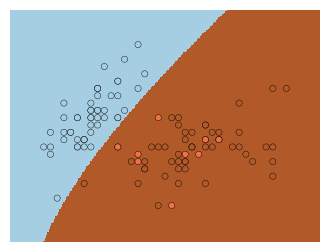

In [48]:
clf = SVC(kernel = 'poly',probability = True,degree = 3)
clf.fit(X_small, y_small)
decision_boundary(clf,X_small,y_small)

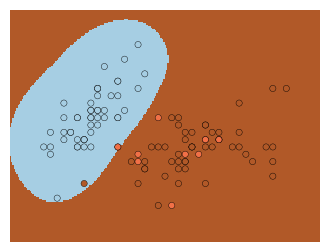

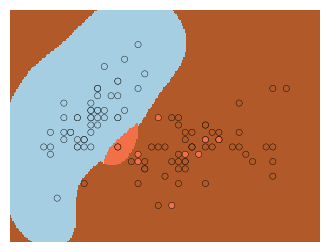

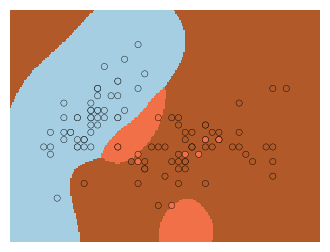

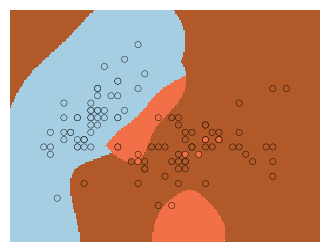

In [49]:
C = [1E-1,1,10,100]
gamma = 3
classifiers = []
for C in C:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_small, y_small)
    decision_boundary(clf,X_small,y_small)

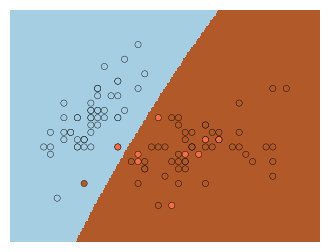

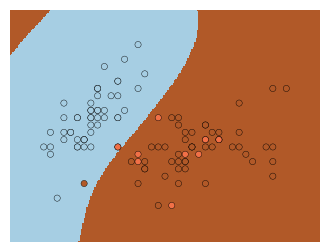

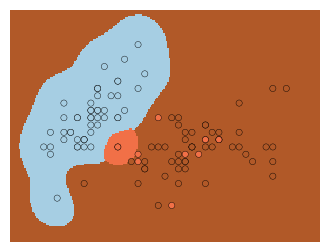

In [50]:
C = 1
gamma = [1e-1, 1, 1e1]
classifiers = []
for gamma in gamma:
    clf = SVC(C=1, gamma=gamma)
    clf.fit(X_small, y_small)
    decision_boundary(clf,X_small,y_small)

By changing the C and keping the gamma constant and vice versa we get a set of plots that provide a good decision boundary , as well as the poly kernel helps to get a good decision boundary , these serve as the best tools to get the job done.
